# **PROJETO - ANÁLISE ESTATÍSTICA DE PREÇOS DE UMA DIETA SAUDÁVEL MUNDIAL**

FONTE: https://databank.worldbank.org/source/food-prices-for-nutrition#

## **CONECTAR COM O GOOGLE DRIVE PARA CAPTAR OS BANCOS DE DADOS**

In [101]:
# conecta o colab ao google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **IMPORTS DE BIBLIOTECAS**

###BIBLIOTECA DE ANÁLISE DE TEMPO DE EXECUÇÃO DO SCRIPT

In [102]:
# Cronometra o tempo de execução do programa

import time
start_script = time.time()

###BIBLIOTECAS RESTANTES

In [103]:
# Importa as bibliotecas necessárias

from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import normaltest
from scipy.stats import t
from scipy import stats


##**FUNÇÕES**

In [104]:
def ler_csv(name_csv):
  df = pd.read_csv(bd_local + '/' + name_csv, header=0, sep = ',', skiprows=0, decimal='.')
  return df

In [105]:
def formatar_titulo(text):
  words = text.split(" ")
  total_string = ""
  for counter, word in enumerate(words):
    if counter>0 and counter % 5 == 0:
      total_string +="\n{}".format(word)
    else:
      total_string +=" {}".format(word)
  return total_string.lstrip()

##**CAPTAÇÃO DE DADOS**

In [106]:
bd_geral = '/content/drive/MyDrive/..Python_Codes/Projeto_Statistic_Analysis_02/'
bd_local = bd_geral + 'BD'
df = ler_csv('284237fa-aba2-47ac-8849-78684c638d57_Data.csv')
# df#.head()

## **TRATAMENTO DE DADOS**

In [107]:
df.drop('Country Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Classification Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Classification Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
df.drop('Time Code',  axis='columns', inplace=True)    # remove colunas desnecessárias

# Remove NaN:
# df.replace('..', np.nan, inplace=True)
# df.replace(0, np.nan, inplace=True)
df = df[df['Country Name'].notna()]
# df.drop('Country Name',  axis='columns', inplace=True)    # remove colunas desnecessárias

# df

In [108]:
# rearranjando dados
df_2017 = df.copy()
df_2017.replace(2018, np.nan, inplace=True)
df_2017.replace(2019, np.nan, inplace=True)
df_2017.replace(2020, np.nan, inplace=True)
df_2017.replace('..', np.nan, inplace=True)
df_2017 = df_2017[df_2017['Time'].notna()]
df_2017.drop('Country Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2017.drop('Time',  axis='columns', inplace=True)    # remove colunas desnecessárias
lista_2017 = list(df_2017['Cost of a healthy diet [CoHD]'])
                  
df_2018 = df.copy()
df_2018.replace(2017, np.nan, inplace=True)
df_2018.replace(2019, np.nan, inplace=True)
df_2018.replace(2020, np.nan, inplace=True)
df_2018.replace('..', np.nan, inplace=True)
df_2018 = df_2018[df_2018['Time'].notna()]
df_2018.drop('Country Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2018.drop('Time',  axis='columns', inplace=True)    # remove colunas desnecessárias
lista_2018 = list(df_2018['Cost of a healthy diet [CoHD]'])
     
df_2019 = df.copy()
df_2019.replace(2017, np.nan, inplace=True)
df_2019.replace(2018, np.nan, inplace=True)
df_2019.replace(2020, np.nan, inplace=True)
df_2019.replace('..', np.nan, inplace=True)
df_2019 = df_2019[df_2019['Time'].notna()]
df_2019.drop('Country Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2019.drop('Time',  axis='columns', inplace=True)    # remove colunas desnecessárias
lista_2019 = list(df_2019['Cost of a healthy diet [CoHD]'])
     
df_2020 = df.copy()
df_2020.replace(2017, np.nan, inplace=True)
df_2020.replace(2018, np.nan, inplace=True)
df_2020.replace(2019, np.nan, inplace=True)
df_2020.replace('..', np.nan, inplace=True)
df_2020 = df_2020[df_2020['Time'].notna()]
df_2020.drop('Country Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
df_2020.drop('Time',  axis='columns', inplace=True)    # remove colunas desnecessárias
lista_2020 = list(df_2020['Cost of a healthy diet [CoHD]'])

In [109]:
df = pd.DataFrame({'2017': lista_2017,
                   '2018': lista_2018,
                   '2019': lista_2019,
                   '2020': lista_2020,
                   })

In [110]:


# transposição
# df = df.transpose()                                       # transpõe o dataframe para facilitar a visualização
# new_header = df.iloc[0]                                   #grab the first row for the header
# df = df[1:]                                               #take the data less the header row
# df.columns = new_header                                   #set the header row as the df header

# renomear colunas
# # colunas1 = ['País']
# colunas2 = list(range(2017,2020+1))
# for n in colunas2:
#   colunas1.append(str(n))

# df.columns = colunas1


# df

In [111]:
# passando os valores do datafame de 'string' para 'float':
df = df.astype(float)

### **REMOÇÃO DE OUTLIERS E DADOS FORA DA CURVA**

In [112]:
df[df > 4.0] = np.nan
df[df < 2.2] = np.nan

### TESTE DE NORMALIDADE

In [113]:
significancia = 0.05  # 95% de confiabilidade
lista_pvalor = []
lista_pvalor_bool = []

for n in df.columns:
  if df[n].count() > 8:
    pvalor = normaltest(df[n].dropna())[1] # retorna a estatistica de teste e o p-valor (precisa remover os NaN)
    lista_pvalor.append(pvalor)
    if pvalor > significancia:
      lista_pvalor_bool.append('Sim')
    else:
      lista_pvalor_bool.append('Não')
  else:
    df.drop(n,  axis='columns', inplace=True)    # remove colunas com menos de 8 dados


# df_resumo

### RESUMO

In [114]:
# criação de dataframe de resumo dos dados:
lista_index = list(df.columns)
lista_media = []
lista_dp = []
lista_num_amostras = []

for n in range(0, len(df.columns)):
  lista_media.append(df[df.columns[n]].mean())
  lista_dp.append(df[df.columns[n]].std())
  lista_num_amostras.append(df[df.columns[n]].count())

df_resumo = pd.DataFrame({'Ano': lista_index, 
                         'Média':lista_media, 
                         'Desvio Padrão': lista_dp,
                          'Amostras': lista_num_amostras})

df_resumo["Variabilidade (%)"] = 100*df_resumo['Desvio Padrão']/df_resumo['Média']

df_resumo['p-Valor (normal test)'] = lista_pvalor
df_resumo['É Normal? (95% signif.)'] = lista_pvalor_bool

df_resumo

,Ano,Média,Desvio Padrão,Amostras,Variabilidade (%),p-Valor (normal test),É Normal? (95% signif.)
0,2017,3.153090,0.417846,155,13.251937,0.055735,Sim
1,2018,3.171047,0.429366,149,13.540194,0.038369,Não
2,2019,3.200630,0.430789,143,13.459519,0.024888,Não
3,2020,3.252429,0.389586,133,11.978324,0.136786,Sim


### T-STUDENT

In [115]:
lista_tstudent = ['-']
lista_tcrit_2caudas = ['-']
lista_p_2caudas = ['-']
lista_tstudent_bool = ['-']

for n in range(1, len(df_resumo.index)):
  t = abs(df_resumo['Média'][n] - df_resumo['Média'][n-1]) / ((df_resumo['Desvio Padrão'][n]/df_resumo['Amostras'][n] + df_resumo['Desvio Padrão'][n-1]/df_resumo['Amostras'][n-1]) ** 0.5)

  lista_tstudent.append(t) # valor t
  lista_tcrit_2caudas.append(stats.t.ppf(q=0.975, df=12)) # t critico pra curva de 2 caudas
  pvalor = 2*(1-stats.t.cdf(x=t, df=12))  # p pra curva de 2 caudas
  lista_p_2caudas.append(pvalor) 
  if pvalor > significancia:
    lista_tstudent_bool.append('Não')
  else:
    lista_tstudent_bool.append('Sim')


df_resumo['Valor t'] = lista_tstudent
df_resumo['Valor t-crít'] = lista_tcrit_2caudas
df_resumo['Valor p (Comparação)'] = lista_p_2caudas
df_resumo['Preço Mudou? (95% signif.)'] = lista_tstudent_bool

### TESTE F

In [116]:
# AINDA NÃO FOI PROJETADO

##**RESULTADOS**

###**GERAÇÃO DE GRÁFICOS**


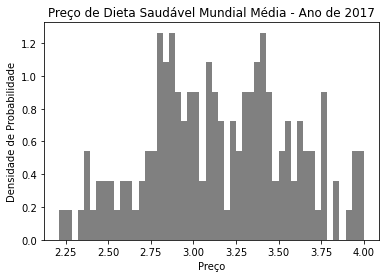

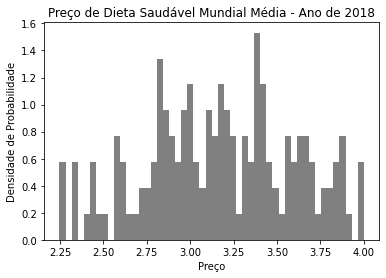

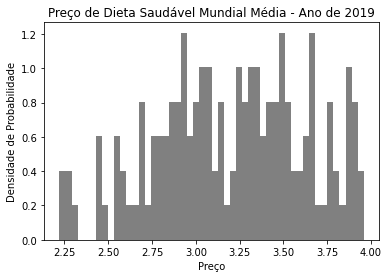

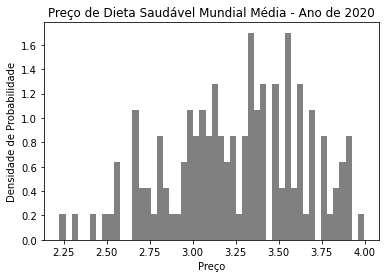

In [117]:
for i in df.columns:
  if i == 'País':
    pass
  else:
    fig, ax = plt.subplots()
    ax.hist(df[i], bins=50, density=True, color='gray',histtype = 'bar')

    ax.set_title("Preço de Dieta Saudável Mundial Média - Ano de " + str(i))
    ax.set_ylabel('Densidade de Probabilidade')
    ax.set_xlabel('Preço')
    fig.savefig(bd_geral + "Imagens/histograma_PreçoComida_anos_" + str(i) + ".png", dpi=300)  

###**GERAÇÃO DE TABELAS**

In [118]:
df_resumo

,Ano,Média,Desvio Padrão,Amostras,Variabilidade (%),p-Valor (normal test),É Normal? (95% signif.),Valor t,Valor t-crít,Valor p (Comparação),Preço Mudou? (95% signif.)
0,2017,3.153090,0.417846,155,13.251937,0.055735,Sim,-,-,-,-
1,2018,3.171047,0.429366,149,13.540194,0.038369,Não,0.240441,2.178813,0.814047,Não
2,2019,3.200630,0.430789,143,13.459519,0.024888,Não,0.38533,2.178813,0.706736,Não
3,2020,3.252429,0.389586,133,11.978324,0.136786,Sim,0.671987,2.178813,0.514322,Não


In [119]:
df_resumo.to_excel(bd_geral + "Planilhas/resumo.xlsx")  

## **FINALIZAÇÃO DO SCRIPT**

In [120]:
# Cronometra o tempo de execução do programa

end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 4.02 segundos
